In [1]:
import nest
import matplotlib.pyplot as plt


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Sep 28 2023 11:53:34

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
nest.rng_seed = 1

<h3>Poisson Distributed Spike-Timings</h3>

<p>Example of one poisson input delivering unique spike trains to two spike recorders</p>


Nov 23 17:14:30 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Nov 23 17:14:30 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

Nov 23 17:14:30 SimulationManager::run [Info]: 
    Simulation finished.


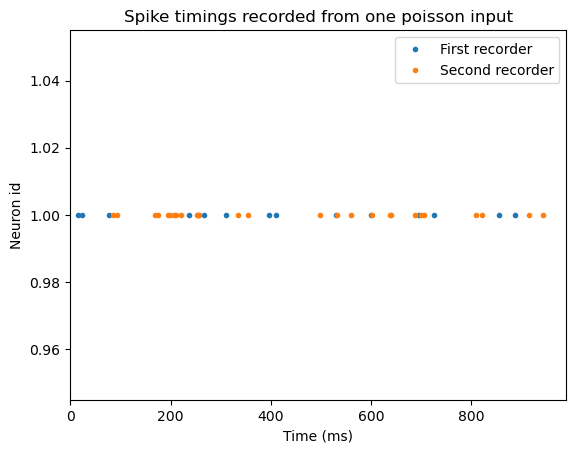

In [3]:
poisson_input = nest.Create('poisson_generator')
poisson_input.set(rate=20)
spike_recorder1 = nest.Create('spike_recorder')
spike_recorder2 = nest.Create('spike_recorder')
nest.Connect(poisson_input, spike_recorder1)
nest.Connect(poisson_input, spike_recorder2)

nest.Simulate(1000)

spike_events1 = spike_recorder1.get('events')
spikes = spike_events1['senders']
spike_times = spike_events1['times']
plt.plot(spike_times, spikes, '.', label='First recorder')

spike_events2 = spike_recorder2.get('events')
spikes = spike_events2['senders']
spike_times = spike_events2['times']
plt.plot(spike_times, spikes, '.', label='Second recorder')

plt.title('Spike timings recorded from one poisson input')
plt.xlim(xmin=0)
plt.xlabel('Time (ms)')
plt.ylabel('Neuron id')

plt.legend()

nest.ResetKernel()


<p>Example of one poisson input delivering the same spike train to two spike recorders via a parrot neuron</p>


Nov 23 17:14:30 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Nov 23 17:14:30 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

Nov 23 17:14:30 SimulationManager::run [Info]: 
    Simulation finished.


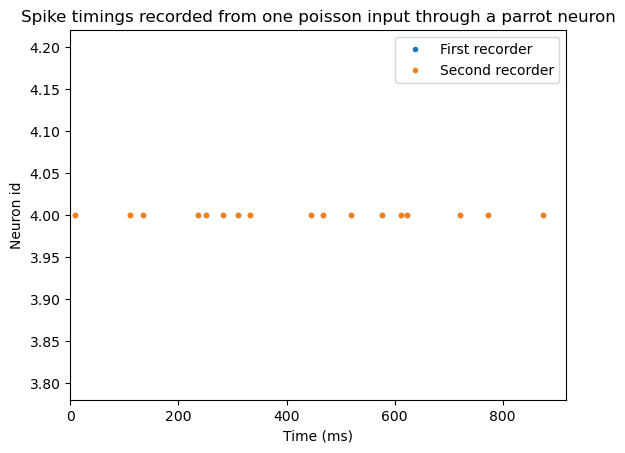

In [4]:
poisson_input = nest.Create('poisson_generator')
poisson_input.set(rate=20)
spike_recorder1 = nest.Create('spike_recorder')
spike_recorder2 = nest.Create('spike_recorder')
parrot_neuron = nest.Create('parrot_neuron')
nest.Connect(poisson_input, parrot_neuron)
nest.Connect(parrot_neuron, spike_recorder1)
nest.Connect(parrot_neuron, spike_recorder2)

nest.Simulate(1000)

spike_events1 = spike_recorder1.get('events')
spikes = spike_events1['senders']
spike_times = spike_events1['times']
plt.plot(spike_times, spikes, '.', label='First recorder')

spike_events2 = spike_recorder2.get('events')
spikes = spike_events2['senders']
spike_times = spike_events2['times']
plt.plot(spike_times, spikes, '.', label='Second recorder')

plt.title('Spike timings recorded from one poisson input through a parrot neuron')
plt.xlim(xmin=0)
plt.xlabel('Time (ms)')
plt.ylabel('Neuron id')

plt.legend()
nest.ResetKernel()

<p>Example of one poisson input projecting to three parrot neurons, each of which is connected to the same spike recorder</p>


Nov 23 17:14:30 NodeManager::prepare_nodes [Info]: 
    Preparing 5 nodes for simulation.

Nov 23 17:14:30 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 5
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

Nov 23 17:14:30 SimulationManager::run [Info]: 
    Simulation finished.


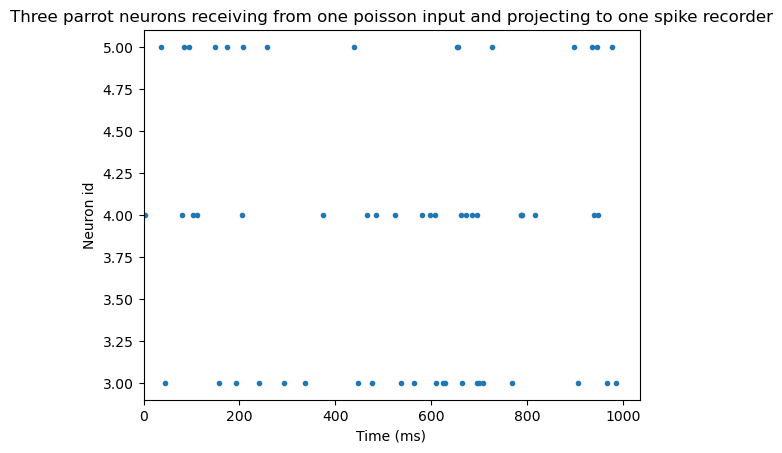

In [5]:
poisson_input = nest.Create('poisson_generator')
poisson_input.set(rate=20)
spike_recorder = nest.Create('spike_recorder')
parrot_neuron1 = nest.Create('parrot_neuron')
parrot_neuron2 = nest.Create('parrot_neuron')
parrot_neuron3 = nest.Create('parrot_neuron')
nest.Connect(poisson_input, parrot_neuron1)
nest.Connect(poisson_input, parrot_neuron2)
nest.Connect(poisson_input, parrot_neuron3)
nest.Connect(parrot_neuron1, spike_recorder)
nest.Connect(parrot_neuron2, spike_recorder)
nest.Connect(parrot_neuron3, spike_recorder)

nest.Simulate(1000)

spike_events = spike_recorder.get('events')
spikes = spike_events['senders']
spike_times = spike_events['times']
plt.plot(spike_times, spikes, '.')
plt.title("Three parrot neurons receiving from one poisson input and projecting to one spike recorder")
plt.xlim(xmin=0)
plt.xlabel('Time (ms)')
plt.ylabel('Neuron id')

nest.ResetKernel()


Nov 23 17:14:30 NodeManager::prepare_nodes [Info]: 
    Preparing 5 nodes for simulation.

Nov 23 17:14:30 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 5
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

Nov 23 17:14:30 SimulationManager::run [Info]: 
    Simulation finished.


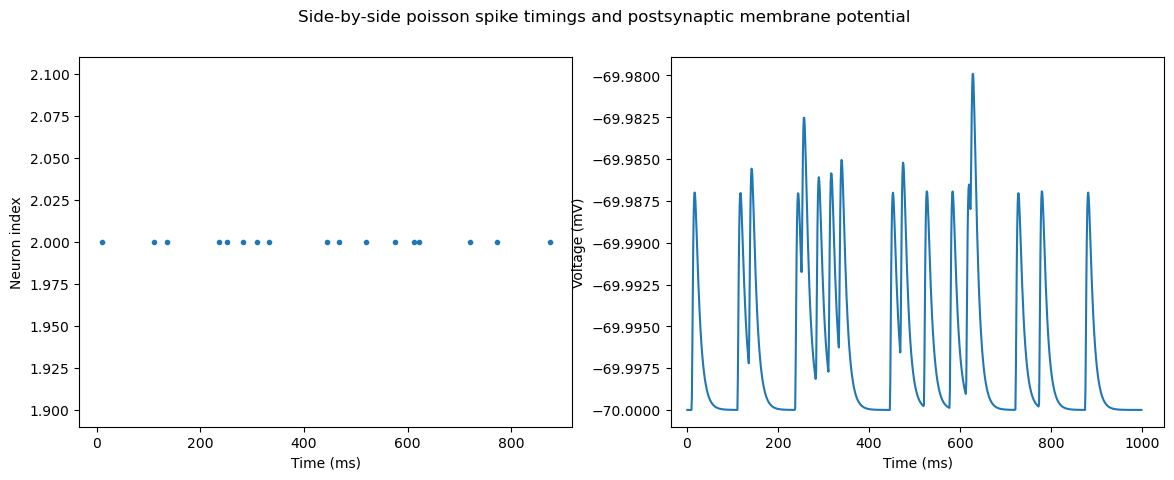

In [6]:
poisson_input = nest.Create('poisson_generator')
poisson_input.set(rate=20)
parrot_neuron = nest.Create('parrot_neuron')
lif_neuron = nest.Create('iaf_psc_alpha')
spike_recorder = nest.Create('spike_recorder')
vm_recorder = nest.Create('multimeter')
vm_recorder.set(record_from=['V_m'])
nest.Connect(poisson_input, parrot_neuron)
nest.Connect(parrot_neuron, lif_neuron)
nest.Connect(parrot_neuron, spike_recorder)
nest.Connect(vm_recorder, lif_neuron)

nest.Simulate(1000)

fig, [ax1, ax2] = plt.subplots(1,2)
fig.set_figwidth(14)

spike_events = spike_recorder.get('events')
spikes = spike_events['senders']
spike_times = spike_events['times']

ax1.plot(spike_times, spikes, '.')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Neuron index')

events = vm_recorder.get('events')
ts = events['times']
vm = events['V_m']

ax2.plot(ts, vm)
ax2.set_xlim(left=-35)
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Voltage (mV)')

fig.suptitle('Side-by-side poisson spike timings and postsynaptic membrane potential')


nest.ResetKernel()
